In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\ntlua\USA_Housing.csv")

In [3]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


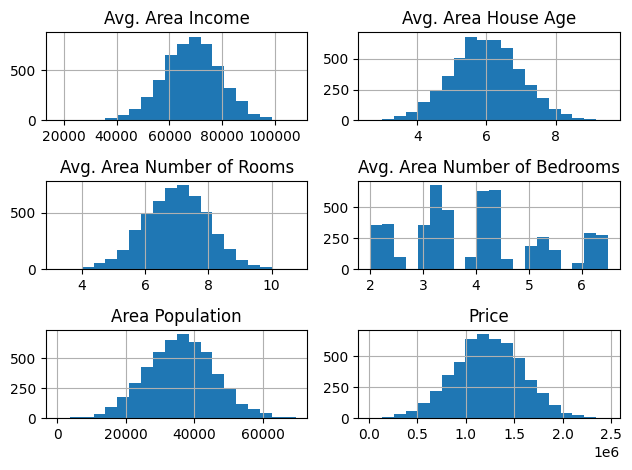

In [13]:
df.hist(bins=20)
plt.tight_layout()
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


<Axes: >

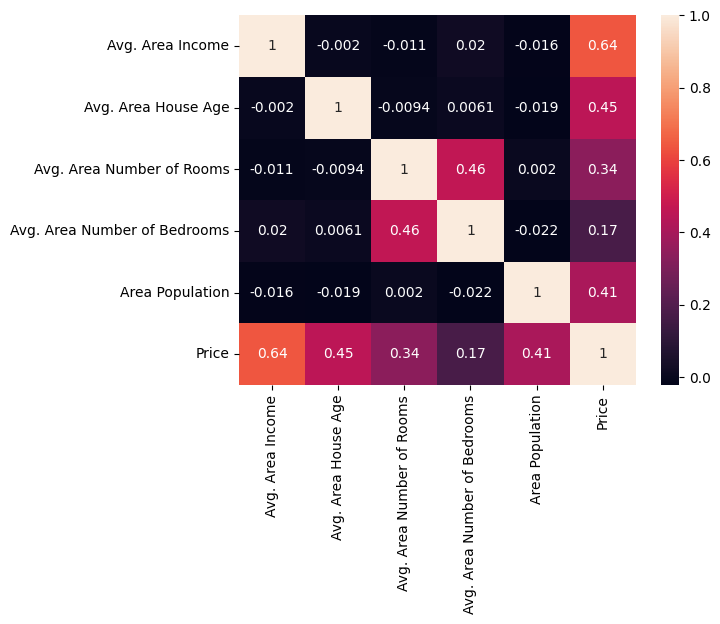

In [5]:
sns.heatmap(df.iloc[:,:-1].corr(), annot=True)

In [25]:
X = df.drop(["Address", "Price"], axis=1)
Y = df["Price"]

In [26]:
X = (X - X.mean()) / X.std(ddof=0)
Y = (Y - Y.mean()) / Y.std(ddof=0)

In [27]:
X, Y

(      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
 0             1.028660            -0.296927                   0.021274   
 1             1.000808             0.025902                  -0.255506   
 2            -0.684629            -0.112303                   1.516243   
 3            -0.491499             1.221572                  -1.393077   
 4            -0.807073            -0.944834                   0.846742   
 ...                ...                  ...                        ...   
 4995         -0.752109             1.869297                  -0.845588   
 4996          0.929740             1.030822                  -0.408686   
 4997         -0.487235             1.284470                  -2.170269   
 4998         -0.054592            -0.446694                   0.141541   
 4999         -0.288313             0.015215                  -0.194342   
 
       Avg. Area Number of Bedrooms  Area Population  
 0                         0.088062        

# Cross-Validation

In [28]:
n_splits = 3
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    print(f"Train index: {train_index}, {len(train_index)}")
    print(f"Test index: {test_index}, {len(test_index)}")

Train index: [   0    1    2 ... 4993 4994 4997], 3333
Test index: [   8   12   14 ... 4996 4998 4999], 1667
Train index: [   2    3    4 ... 4996 4998 4999], 3333
Test index: [   0    1    6 ... 4989 4993 4997], 1667
Train index: [   0    1    6 ... 4997 4998 4999], 3334
Test index: [   2    3    4 ... 4991 4992 4994], 1666


In [29]:
lm = LinearRegression()
R2 = []
for train_index, test_index in kf.split(X):
    X_train, X_test, Y_train, Y_test = X.iloc[train_index, :], X.iloc[test_index, :], Y[train_index], Y[test_index]

    lm.fit(X_train, Y_train)
    y_pred = lm.predict(X_test)
    r2 = r2_score(Y_test, y_pred)
    R2.append(r2)
R2

[0.9167819166664554, 0.9137310871979234, 0.9228083418208473]

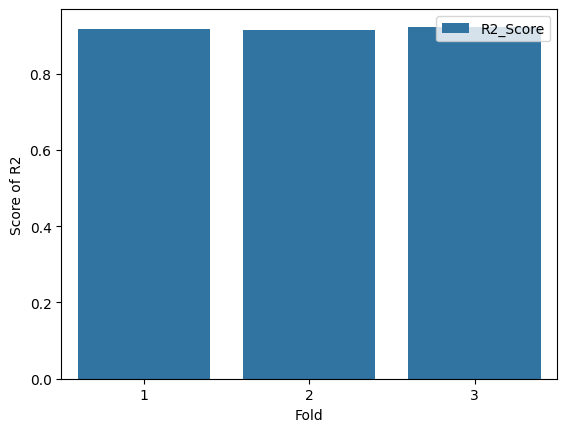

In [30]:
ax = sns.barplot(y=R2, x=[i + 1 for i in range(n_splits)], label="R2_Score")
ax.set_xlabel("Fold")
ax.set_ylabel("Score of R2")
plt.show()

# Normal way

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=42)

In [32]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [62]:
lr.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

In [63]:
lr.intercept_

-2638673.4261913267

In [33]:
y_pred = lr.predict(X_test)
r2 = r2_score(Y_test, y_pred)
print(r2)

0.9146818498754016


In [34]:
pd.DataFrame(lr.coef_, X.columns, columns=["Coeff"])

,Coeff
Avg. Area Income,0.652722
Avg. Area House Age,0.464932
Avg. Area Number of Rooms,0.341322
Avg. Area Number of Bedrooms,0.008252
Area Population,0.427717


In [35]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [66]:
X_train.shape

(3500, 5)

In [67]:
X_train_poly.shape

(3500, 21)

In [68]:
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

In [69]:
new_lr = LinearRegression()
new_lr.fit(X_train_poly, Y_train)
new_y_pred = new_lr.predict(X_test_poly)
new_r2 = r2_score(Y_test, new_y_pred)
print(new_r2)

0.914566932419506


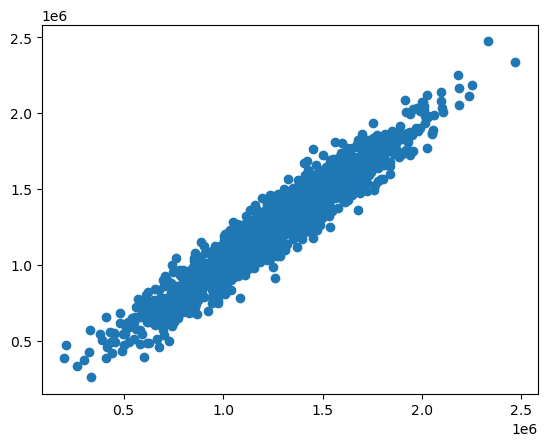

In [74]:
plt.scatter(Y_test, y_pred)